In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [41]:
#Reading in data
df = pd.read_csv('Data/SpotifyData.csv')
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Genre/Mood,Language,release_year
0,Tu Hi Hain Aashiqui,"Dishkiyaoon (feat. Palak Muchhal, Gayatri Ganj...",Various Artists,2014-03-12,298053,0,0.484,0.537,0.484,0.553,0.000000,0.0876,-5.384,0.0277,99.585,4,Hip-Hop,Hindi,2014
1,Tu Bin Bataye,Rang De Basanti (Original Motion Picture Sound...,A.R. Rahman,2005-12-04,357626,43,0.528,0.399,0.528,0.427,0.018800,0.0931,-10.848,0.0325,120.076,4,Hip-Hop,Hindi,2005
2,"Ajj Din Chadheya (From ""Love Aaj Kal "")",Love Aaj Kal,Pritam,2009-06-27,315013,44,0.585,0.551,0.585,0.687,0.000007,0.1210,-4.553,0.0724,85.871,4,Hip-Hop,Hindi,2009
3,"Main Jahaan Rahoon (From ""Namastey London"")",Namastey London,Himesh Reshammiya,2007-01-27,382493,43,0.584,0.362,0.584,0.556,0.000029,0.1300,-8.980,0.0514,103.739,4,Hip-Hop,Hindi,2007
4,Kaisa Yeh Junoon,Greatest Collection - Rahat Fateh Ali Khan,Rahat Fateh Ali Khan,2010-03-29,250453,26,0.669,0.655,0.669,0.517,0.000000,0.0913,-6.784,0.0277,115.977,4,Hip-Hop,Hindi,2010


In [11]:
###########
#EDA
###########

In [42]:
df.info() #Need to encode categorical variables such as Genre/Mood and Language

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1253 non-null   object 
 1   album             1253 non-null   object 
 2   artist            1253 non-null   object 
 3   release_date      1253 non-null   object 
 4   length            1253 non-null   int64  
 5   popularity        1253 non-null   int64  
 6   danceability      1253 non-null   float64
 7   acousticness      1253 non-null   float64
 8   danceability.1    1253 non-null   float64
 9   energy            1253 non-null   float64
 10  instrumentalness  1253 non-null   float64
 11  liveness          1253 non-null   float64
 12  loudness          1253 non-null   float64
 13  speechiness       1253 non-null   float64
 14  tempo             1253 non-null   float64
 15  time_signature    1253 non-null   int64  
 16  Genre/Mood        1253 non-null   object 


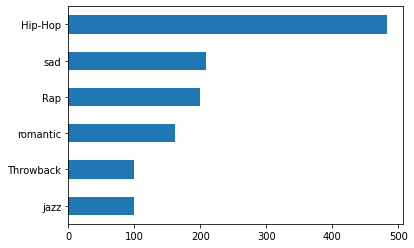

In [43]:
#Check each genre/mood
df['Genre/Mood'].value_counts().sort_values().plot(kind = 'barh')

In [45]:
#426 unique artists in dataset
len(df['artist'].unique())

426

In [46]:
#Check for 10 most frequent artists
n = 10
df['artist'].value_counts()[:n].index.tolist()

['Post Malone',
 'XXXTENTACION',
 'Drake',
 'The Weeknd',
 'Various Artists',
 'Vishal-Shekhar',
 'Shankar-Ehsaan-Loy',
 '50 Cent',
 'Pritam',
 'Jatin-Lalit']

In [47]:
#Check for most frequent artists by genre
group_genre = df.groupby("Genre/Mood")["artist"].value_counts().nlargest(15)
group_genre

Genre/Mood  artist            
Hip-Hop     Post Malone           56
sad         XXXTENTACION          53
            Drake                 44
Hip-Hop     The Weeknd            41
Throwback   Vishal-Shekhar        30
            Shankar-Ehsaan-Loy    25
Rap         50 Cent               23
Hip-Hop     Various Artists       18
romantic    Various Artists       18
Throwback   Jatin-Lalit           15
jazz        Miles Davis           13
Hip-Hop     Maluma                12
sad         Lewis Capaldi         12
Hip-Hop     Sachin-Jigar          11
Rap         Lil Uzi Vert          11
Name: artist, dtype: int64

In [48]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
encodedVariables = df[['Genre/Mood','Language']]
enc.fit(encodedVariables[["Genre/Mood","Language"]])
encodedVariables[["Genre/Mood","Language"]] = enc.transform(encodedVariables[["Genre/Mood","Language"]])

In [49]:
#Ensuring different genres are encoded
encodedVariables['Genre/Mood'].value_counts()

0.0    483
5.0    208
1.0    200
4.0    162
3.0    100
2.0    100
Name: Genre/Mood, dtype: int64

In [50]:
#Ensuring different languages are encoded
encodedVariables['Language'].value_counts()

0.0    821
1.0    232
2.0    200
Name: Language, dtype: int64

In [59]:
#Concatenating encoded columns to original dataframe
df['encodedLanguage'] = encodedVariables['Language']
df['encodedGenre'] = encodedVariables['Genre/Mood']
df.tail()

##########
#Mapping
##########

#Genre:
#sad: 5
#romantic: 4
#jazz: 3
#Throwback: 2
#Rap: 1
#Hip-Hop: 0

#Language:
#Spanish: 2
#Hindi: 1
#English: 0

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,...,liveness,loudness,speechiness,tempo,time_signature,Genre/Mood,Language,release_year,encodedLanguage,encodedGenre
1248,"DJ No Pare (feat. Zion, Dalex, Lenny Tavárez) ...","DJ No Pare (feat. Zion, Dalex, Lenny Tavárez) ...",Justin Quiles,2019-09-06,258600,79,0.743,0.0451,0.743,0.709,...,0.0809,-3.922,0.0879,170.001,4,Hip-Hop,Spanish,2019,2.0,0.0
1249,Loco - Remix,Loco (Remix),Various Artists,2020-04-24,248499,81,0.908,0.1570,0.908,0.529,...,0.0634,-7.032,0.1350,105.021,4,Hip-Hop,Spanish,2020,2.0,0.0
1250,Feel Me,The Academy,Rich Music LTD,2019-10-11,300266,78,0.769,0.1200,0.769,0.747,...,0.0417,-4.560,0.1270,81.034,4,Hip-Hop,Spanish,2019,2.0,0.0
1251,Ella No Quiere Rosé,Ella No Quiere Rosé,Rvfv,2019-11-22,182500,60,0.861,0.1620,0.861,0.599,...,0.0322,-6.162,0.1420,95.990,4,Hip-Hop,Spanish,2019,2.0,0.0
1252,Morado,Morado,J Balvin,2020-01-09,200666,81,0.881,0.1370,0.881,0.696,...,0.0927,-3.838,0.0797,97.002,4,Hip-Hop,Spanish,2020,2.0,0.0


In [60]:
#######
#Model Building
######

In [73]:
#Main factors we are evaluating is release_year, genre/mood, artist, popularity to determine the song that we will output
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#vectorizer = TfidfVectorizer()
#df['artist'] = vectorizer.fit_transform(df['artist'])
X = df[['encodedGenre','encodedLanguage','release_year','popularity']]
y = df['name']

#Standardize variables
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [75]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [80]:
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
#print(classification_report(y_test,pred))

In [82]:
#Choosing k value
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
#Elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #Ideal seems to be 30

In [85]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [90]:
print(X_test[:1])

encodedGenre  encodedLanguage  release_year  popularity
719           4.0              0.0          2016          74


In [92]:
print(y_test[:1])

719    Say You Won't Let Go
Name: name, dtype: object


In [91]:
knn.predict(X_test[:1])

array(['Already Gone'], dtype=object)